## Observations and Insights 


* The comparative study of Capomulin treatment for squamous cell carcinoma (SCC) involves eight other drugs and a placebo regimen. Each were conducted to an average population of 189 mice. The sample size was not normally distributed. Capomulin drug had the maximum sample size of 230, while Propriva had the smallest sample of 161. 

    A total number of 249 mice were tested but this analysis considers only 248, after Mouse ID g989 was dropped due to duplicate time points in the dataset.
    
    Gender distribution consists of nearly equal number of female and male mice. 
    
    Of the four drugs of interest (Capomulin, Ramicane, Infubinol, and Ceftamin), only Infubinol had one outlier data point based on the average final tumor volume. 
    
    The Mouse Weight and Average Tumor Volume indicators of Capomulin drug had a strong positive correlation with a Pearson's R Value of 0.84, demonstrated by a firm or straight-line of regression. 
    
    A randomly selected mouse ID s185, manifested decreasing tumor volume levels as the time point increases while on Capomulin regimen. 
    
    
-----


In [ ]:
%matplotlib notebook

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [5]:
# Read the mouse data and display preview
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head(1)

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)
0     k403     Ramicane  Male          21          16

In [6]:
# Read study results and display preview
study_results = pd.read_csv(study_results_path)
study_results.head(1)

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0

In [7]:
# Combine the data into a single dataset
combine_data = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")
# Display the data for preview
combine_data.head(1)

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   

   Tumor Volume (mm3)  Metastatic Sites  
0                45.0                 0

In [8]:
# Checking the number of mice in the DataFrame
total_mice = len(combine_data['Mouse ID'].unique())
print(f"The total mice count is: {total_mice}")

The total mice count is: 249


In [9]:
# Before beginning the analysis, check for any mouse ID with duplicate time points and remove any data associated with that mouse ID.

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint 
duplicate_mouse = combine_data.loc[combine_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
print(f"Mouse ID: {duplicate_mouse} has duplicate time points")

Mouse ID: ['g989'] has duplicate time points


In [10]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_mouse = combine_data.loc[combine_data['Mouse ID'] =='g989', :]
g989_mouse

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1  
918           56.045564                 1  
919           59.082294                 1  
920           62.570880                 2

In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
clean_data = combine_data.loc[combine_data['Mouse ID'] != 'g989', :]
clean_data.head(1)

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   

   Tumor Volume (mm3)  Metastatic Sites  
0                45.0                 0

In [12]:
# Checking the number of mice after cleaning the data
total_mice2 = len(clean_data['Mouse ID'].unique())            
print(f"The total number of mice is now: {total_mice2} after the data was cleaned" )

The total number of mice is now: 248 after the data was cleaned


## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
Population = combine_data.groupby('Drug Regimen') ['Tumor Volume (mm3)'].count()
mean = combine_data.groupby("Drug Regimen") ['Tumor Volume (mm3)'].mean()
median = combine_data.groupby('Drug Regimen') ['Tumor Volume (mm3)'].median()
variance = combine_data.groupby('Drug Regimen') ['Tumor Volume (mm3)'].var()
stdv = combine_data.groupby('Drug Regimen') ['Tumor Volume (mm3)'].std()
sem = combine_data.groupby('Drug Regimen') ['Tumor Volume (mm3)'].sem()

summary_statistics = pd.DataFrame({'Population': Population, 'Mean': mean, 'Median': median, 'Variane': variance,
                                   'Standard Deviation': stdv, 'SEM': sem})
summary_statistics

Population       Mean     Median    Variane  Standard Deviation  \
Drug Regimen                                                                    
Capomulin            230  40.675741  41.557809  24.947764            4.994774   
Ceftamin             178  52.591172  51.776157  39.290177            6.268188   
Infubinol            178  52.884795  51.820584  43.128684            6.567243   
Ketapril             188  55.235638  53.698743  68.553577            8.279709   
Naftisol             186  54.331565  52.509285  66.173479            8.134708   
Placebo              181  54.033581  52.288934  61.168083            7.821003   
Propriva             161  52.322552  50.854632  42.351070            6.507770   
Ramicane             228  40.216745  40.673236  23.486704            4.846308   
Stelasyn             181  54.233149  52.431737  59.450562            7.710419   
Zoniferol            182  53.236507  51.818479  48.533355            6.966589   

                   SEM  
Drug Regimen            
Capomulin     0.329346  
Ceftamin      0.469821  
Infubinol     0.492236  
Ketapril      0.603860  
Naftisol      0.596466  
Placebo       0.581331  
Propriva      0.512884  
Ramicane      0.320955  
Stelasyn      0.573111  
Zoniferol     0.516398

In [14]:
sample_size = summary_statistics['Population'].mean()
print(f"The average sample size accross all treament regimen is: {sample_size}")

The average sample size accross all treament regimen is: 189.3


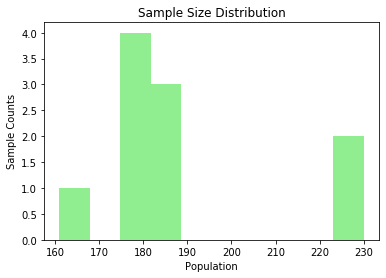

The sample size was not normally distributed


<Figure size 432x288 with 0 Axes>

In [80]:
plt.hist(summary_statistics['Population'], color='lightgreen')
plt.title("Sample Size Distribution")
plt.xlabel("Population")
plt.ylabel("Sample Counts")
plt.show()
print(f"The sample size was not normally distributed")
plt.savefig("charts/HistoSampleSize.png")

## Bar and Pie Charts

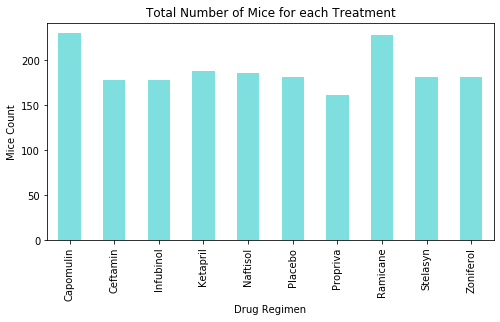

<Figure size 432x288 with 0 Axes>

In [83]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_treated = summary_statistics[['Population']]
mice_treated = mice_treated.rename(columns = {'Population': 'Total Number of Mice'})
mice_treated.plot(kind='bar', figsize=(8,4), color = 'c', alpha=0.5, align='center', legend=False) #No legend as it is redundant
plt.title("Total Number of Mice for each Treatment")
plt.ylabel("Mice Count")
plt.show()
plt.tight_layout()
plt.savefig("charts/PandaBarChart.png")

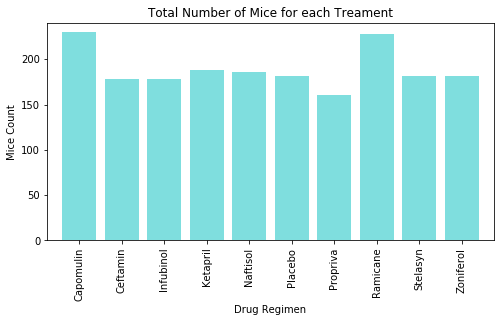

<Figure size 432x288 with 0 Axes>

In [84]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(mice_treated))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(8,4))
plt.bar(x_axis, mice_treated['Total Number of Mice'], color = 'c', alpha=0.5, align='center') #No legend as it is redundant
plt.xticks(tick_locations, mice_treated.index.values, rotation='vertical')
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(mice_treated['Total Number of Mice'])+10)
plt.title("Total Number of Mice for each Treament")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")
plt.show()
plt.savefig("charts/PandaBarChart.png")

In [18]:
# Calculate gender distribution from the cleaned data
female_group = clean_data.groupby(['Sex']).get_group(('Female'))
female_count = len(female_group['Mouse ID'].unique())
male_group = clean_data.groupby(['Sex']).get_group(('Male'))
male_count = len(male_group['Mouse ID'].unique())
# Display values
gender = {'Gender':[female_count, male_count]}
gender_df = pd.DataFrame(gender, index=['Female', 'Male'])
gender_df

Gender
Female     123
Male       125

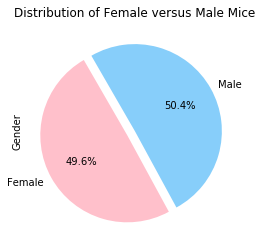

<Figure size 432x288 with 0 Axes>

In [85]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ['pink', 'lightskyblue']
explode = (0.1, 0)
gender_df.plot(kind='pie', labels=gender_df.index.values, autopct='%1.1f%%', startangle=120, 
               subplots=True, legend=False, explode=explode, colors=colors)
plt.title('Distribution of Female versus Male Mice')
plt.show()
plt.savefig("charts/PandaPieChart.png")

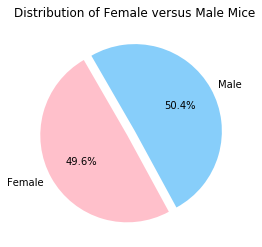

<Figure size 432x288 with 0 Axes>

In [87]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ['pink', 'lightskyblue']
explode = (0.1, 0)
plt.pie(gender_df['Gender'], labels=gender_df.index.values, autopct='%1.1f%%', startangle=120, 
        explode=explode, colors=colors)
plt.title('Distribution of Female versus Male Mice')
plt.show()
plt.savefig("charts/PyPlotChart.png")

## Quartiles, Outliers and Boxplots

In [71]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list = clean_data.loc[(clean_data['Drug Regimen'] =='Capomulin') | 
                             (clean_data['Drug Regimen'] =='Ramicane') |
                            (clean_data['Drug Regimen'] == 'Infubinol') |
                            (clean_data['Drug Regimen'] == 'Ceftamin'), :]

# Sort drug list by showing first the last(greatest) timepoint
drug_list = drug_list.sort_values(['Drug Regimen', 'Mouse ID','Timepoint'], ascending =False)
# Keep the last (greatest) timepoint & drop the other values
sortlast_timepoint = drug_list.drop_duplicates(subset='Mouse ID', keep='first')
# Finalize the list with Timepoint and its corresponding Tumor Volume indicators
druglist_indicators = sortlast_timepoint[['Drug Regimen', 'Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]
druglist_indicators.head()

Drug Regimen Mouse ID  Timepoint  Tumor Volume (mm3)
84      Ramicane     z578         45           30.638696
453     Ramicane     y449         15           44.183451
449     Ramicane     w678          5           43.166373
410     Ramicane     u196         45           40.667713
59      Ramicane     s508         45           30.276232

In [72]:
# Table for IQR calculations and Plotting
final_list = pd.pivot_table(druglist_indicators, values='Tumor Volume (mm3)', index=['Mouse ID'],
                           columns='Drug Regimen')
final_list.head(100)

Drug Regimen  Capomulin   Ceftamin  Infubinol   Ramicane
Mouse ID                                                
a203                NaN        NaN  67.973419        NaN
a251                NaN        NaN  65.525743        NaN
a275                NaN  62.999356        NaN        NaN
a411                NaN        NaN        NaN  38.407618
a444                NaN        NaN        NaN  43.047543
...                 ...        ...        ...        ...
y769                NaN  68.594745        NaN        NaN
y793          31.896238        NaN        NaN        NaN
y865                NaN  64.729837        NaN        NaN
z578                NaN        NaN        NaN  30.638696
z581                NaN        NaN  62.754451        NaN

[100 rows x 4 columns]

In [73]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
Select_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Set counter when printing out the results of calculations
counter = 0
# Calculate Quartiles for each drug
for drug in Select_drugs:
    quartiles = final_list[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    # Print the calculations
    if counter == 0:
        print(f"--------------------------------------------------------")
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f"--------------------------------------------------------")
    counter += 1

--------------------------------------------------------
Capomulin IQR data is:
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.13 
Values below 20.71 for Capomulin could be outliers.
Values above 51.83 for Capomulin could be outliers.
--------------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The the median of Ramicane is: 36.56 
Values below 17.91 for Ramicane could be outliers.
Values above 54.31 for Ramicane could be outliers.
--------------------------------------------------------
Infubinol IQR data is:
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The the median of Infubinol is: 60.17 
Values below 36.83 for Infubinol could be outliers.


In [90]:
# Create a new list for the box and whisker plot to determine any potential outliers
boxplot_list = []

# Loop through select drugs to add to the boxplot list and drop NaN values
for drug in Select_drugs:
    boxplot_list.append(list(final_list[drug].dropna()))

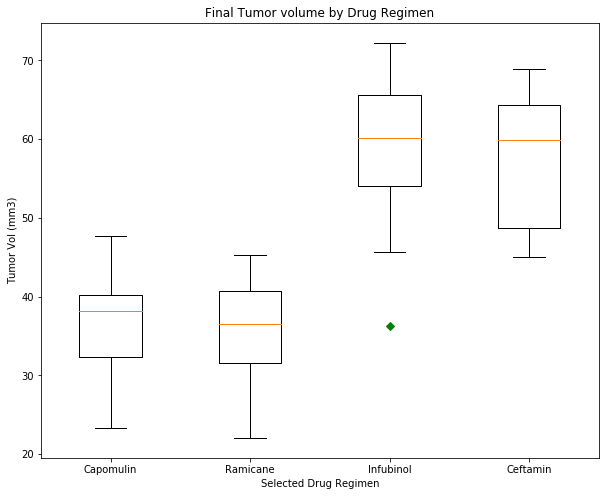

<Figure size 432x288 with 0 Axes>

In [91]:
# Plot the list of lists using a boxplot utilizing the same y-axis for all plots
fig1, ax = plt.subplots(figsize=(10,8))
ax.set_title('Final Tumor volume by Drug Regimen')
ax.set_xlabel('Selected Drug Regimen')
ax.set_ylabel('Tumor Vol (mm3)')
ax.boxplot(boxplot_list,notch=0,sym='gD')
plt.xticks([1,2,3,4],Select_drugs)
plt.show()
plt.savefig("charts/BoxWhiskerPlot.png")

## Line and Scatter Plots

In [93]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Create a new DataFrame for Capomulin
capomulin_data = clean_data.loc[clean_data['Drug Regimen'] == "Capomulin"]
capomulin_data = capomulin_data.reset_index()
capomulin_data.head(1)

index Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0     10     s185    Capomulin  Female           3          17          0   

   Tumor Volume (mm3)  Metastatic Sites  
0                45.0                 0

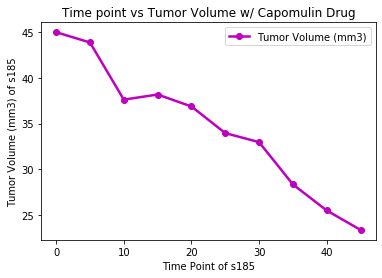

<Figure size 432x288 with 0 Axes>

In [94]:
# Select a mouse that was treated with Capomulin 
s185_mouse = capomulin_data.loc[capomulin_data['Mouse ID'] == "s185"]

# Associate with timepoint versus tumor volume
s185_mouse = s185_mouse.loc[:, ['Timepoint', 'Tumor Volume (mm3)']]
s185_mouse= s185_mouse.reset_index(drop=True)

# Display line plot
s185_mouse.set_index('Timepoint').plot(kind='line', figsize=(6,4), linewidth=2.5, color='m', marker='o', legend=True)
plt.title("Time point vs Tumor Volume w/ Capomulin Drug")
plt.xlabel("Time Point of s185")
plt.ylabel("Tumor Volume (mm3) of s185")
plt.show()
plt.tight_layout()
plt.savefig("charts/LineChart.png")

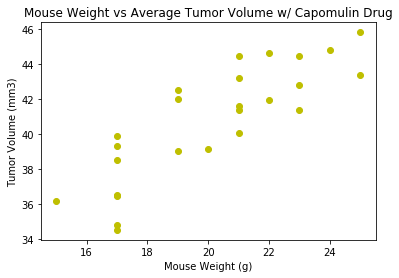

In [95]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen

# Set x & y values
mouse_weight = capomulin_data.groupby(capomulin_data['Mouse ID'])['Weight (g)'].unique()
avg_tumor_volume = capomulin_data.groupby(capomulin_data['Mouse ID'])['Tumor Volume (mm3)'].mean()

# Display scatter plot
plt.scatter(mouse_weight, avg_tumor_volume, color='y')
plt.title("Mouse Weight vs Average Tumor Volume w/ Capomulin Drug")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show
plt.savefig("charts/ScatterPlot.png")

## Correlation and Regression

In [96]:
# Calculate the correlation coefficient 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = capomulin_data.groupby(capomulin_data['Mouse ID'])['Weight (g)'].mean()
avg_tumor_volume = capomulin_data.groupby(capomulin_data['Mouse ID'])['Tumor Volume (mm3)'].mean()

correlation = round(st.pearsonr(mouse_weight, avg_tumor_volume)[0],2)
print(f"The correlation between mouse weight and the average tumor volume variables is {correlation}")

The correlation between mouse weight and the average tumor volume variables is 0.84


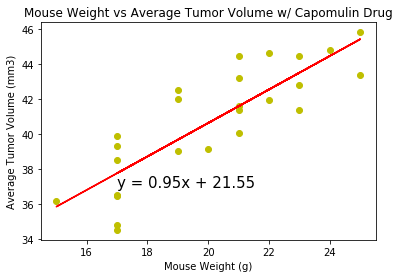

The regression line equation is: y = 0.95x + 21.55
It shows a straight line, indicating a positive strong correlation


<Figure size 432x288 with 0 Axes>

In [98]:
# Calculate the linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

slope, intercept, rvalue, pvalue, stderr = st.linregress(mouse_weight, avg_tumor_volume)

regress_value = slope * mouse_weight + intercept
regress_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
# Display scatter plot with the linear model
x_values = mouse_weight
y_values = avg_tumor_volume
plt.scatter(x_values,y_values, color='y')
plt.plot(x_values, regress_value, 'r-')
plt.annotate(regress_eq,(17,37),fontsize=15,color="black")
plt.title("Mouse Weight vs Average Tumor Volume w/ Capomulin Drug")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
plt.savefig("charts/LinearRegression.png")
print(f"The regression line equation is: {regress_eq}")
print(f"It shows a straight line, indicating a positive strong correlation")